In [2]:
import sys
sys.path.append("..")
from functions.pipeline import *

In [3]:
dataloader = get_batch("../ACDC",10,debug=True)

In [4]:
embeddings,ground_truths = next(iter(dataloader))

In [5]:
prompt_class_1 = []
prompt_class_2 = []
prompt_class_3 = []
for id,ground_truth in enumerate(ground_truths):
    print(id)
    print("class1")
    prompt_class_1.append(batch_sample_from_class(10, ground_truth, 1, n_foreground = 1, n_background= 1))
    print("class2")
    prompt_class_2.append(batch_sample_from_class(10, ground_truth, 2, n_foreground = 1, n_background= 1))
    print("class3")
    prompt_class_3.append(batch_sample_from_class(10, ground_truth, 3, n_foreground = 1, n_background= 1))

0
class1
class2
class3
1
class1
class2
class3
2
class1
class2
class3
3
class1
class2
class3
4
class1
class2
class3
5
class1
class2
class3
6
class1
class2
class3
7
class1
class2
class3
8
class1
n_foreground was reduced to 0.
class2
class3
9
class1
class2
class3


In [6]:
prompt_class_1[8]

(tensor([[[110,  96]],
 
         [[114, 109]],
 
         [[115, 104]],
 
         [[107, 108]],
 
         [[107,  97]],
 
         [[116, 103]],
 
         [[111, 105]],
 
         [[108, 113]],
 
         [[109, 109]],
 
         [[110, 107]]]),
 tensor([[0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.]]))

In [7]:
test = analyze(embeddings,ground_truths)

In [9]:
masks,class1,class2,class3 = test.generate_masks(prompt_class_1,prompt_class_2,prompt_class_3,10)

torch.Size([10, 3, 256, 216])
torch.Size([10, 3, 256, 216])
torch.Size([10, 3, 256, 216])
torch.Size([10, 3, 256, 216])
torch.Size([10, 3, 256, 216])
torch.Size([10, 3, 256, 216])
torch.Size([10, 3, 256, 216])
torch.Size([10, 3, 256, 216])
torch.Size([10, 3, 256, 216])
torch.Size([10, 3, 256, 216])


In [10]:
print(masks[0][0].shape)
mask = masks[0][0].cpu().numpy()

torch.Size([1, 256, 216])


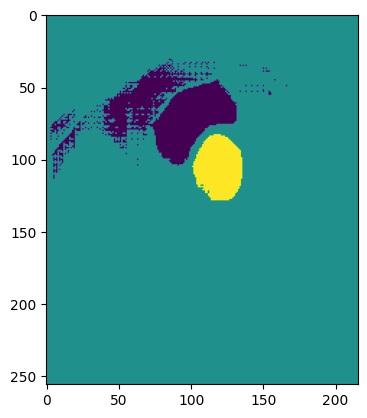

In [11]:
# Mask prediction after calculating logits
import matplotlib.pyplot as plt
plt.imshow(mask[0,:,:])

In [20]:
# Class 2 was the whole back ground
# Class 3 has no pixels
len(mask[mask == 3])

0

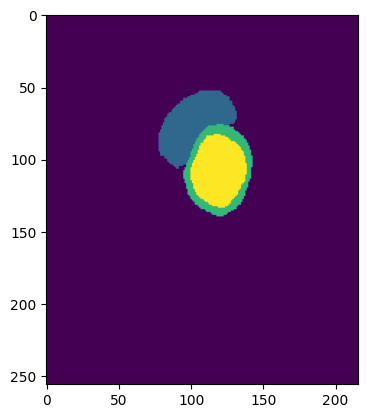

In [38]:
plt.imshow(ground_truths[0,:,:])

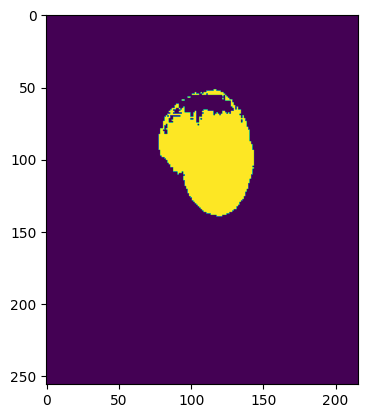

In [16]:
# Class 2 prediction
c2 = class2[0][0].cpu().numpy()
plt.imshow(c2[0,:,:]> 0)

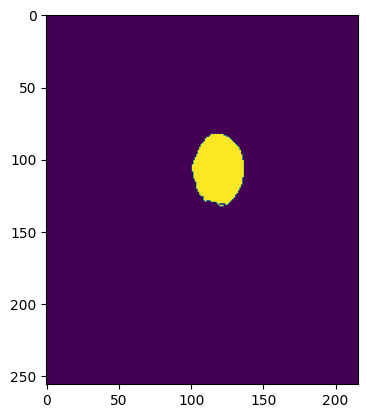

In [17]:
# Class 3 prediction
c3 = class3[0][0].cpu().numpy()
plt.imshow(c3[0,:,:]> 0)

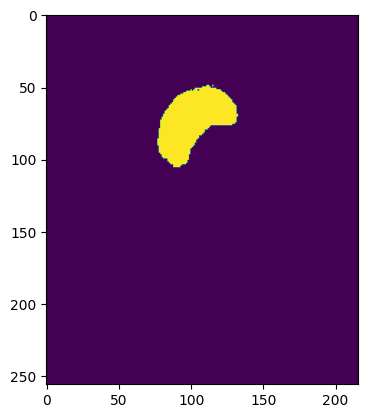

In [18]:
# Class 1 prediction
c1 = class1[0][0].cpu().numpy()
plt.imshow(c1[0,:,:]> 0)